<a href="https://colab.research.google.com/github/ssvadla/MachineLearning/blob/main/MultivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("/content/drive/My Drive/5505_MachineLearning/monet.csv")
data.head(10)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
5,1.870000,25.6,31.9,1,4,1
6,5.282500,25.5,35.6,1,5,1
7,5.065750,26.0,34.3,1,5,2
8,1.375000,25.6,36.2,1,5,2
9,2.530000,25.6,36.4,1,6,2


In [6]:
from sklearn import preprocessing
data = preprocessing.normalize(data, axis=0)
names = ['PRICE','HEIGHT','WIDTH','SIGNED','PICTURE','HOUSE']
norm_data = pd.DataFrame(data, columns=names)
norm_data.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,0.036338,0.034904,0.036559,0.053225,0.000227,0.028094
1,0.080068,0.052273,0.036559,0.053225,0.000453,0.056188
2,0.001198,0.011307,0.022707,0.000000,0.000680,0.084282
3,0.018538,0.042114,0.045699,0.053225,0.000907,0.056188
4,0.013534,0.042114,0.045699,0.053225,0.000907,0.056188


In [7]:
from sklearn import linear_model
Independent_X = norm_data[['HEIGHT','WIDTH','SIGNED','PICTURE','HOUSE']]
Dependent_y = norm_data['PRICE']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Independent_X, Dependent_y, test_size = 0.2, random_state = 42)

In [9]:
classifier_model = linear_model.LinearRegression()
classifier_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Prediction of test set
predictions_test= classifier_model.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(predictions_test))

Prediction for test set: [ 0.06424709  0.04726703  0.01422611  0.03012754  0.04149471  0.0312975
  0.02981982  0.02744427  0.03006353  0.03763642  0.04004159  0.01376199
  0.00673298 -0.00592007  0.01666901  0.02362847  0.02971635  0.0079931
  0.02929396  0.03810784  0.03921987  0.05862088  0.03834613  0.02839589
  0.02512584  0.02580364  0.03962896  0.01852403  0.03259553  0.0210448
  0.02878556  0.03267193  0.0373624   0.03447011  0.04218551  0.01958549
  0.02996533  0.03901295  0.06110325  0.04681264  0.08265996  0.02563889
  0.01664168  0.02560042  0.03242483  0.03487456  0.01896782  0.01958549
  0.0153428   0.02726674  0.02216904  0.05030347  0.03880083  0.01131258
  0.01588037  0.0248566   0.01765061  0.02706968  0.03703328  0.02954187
  0.02037989 -0.00526301  0.0147013   0.0259765   0.03233128  0.0403038
  0.04203762  0.03466688  0.03763642  0.01736644  0.035039    0.02449617
  0.01958237  0.03751019  0.03291175  0.03695022  0.02637435  0.01686891
  0.01634642  0.02107538  0.02

In [12]:
predictions_test.shape


(86,)

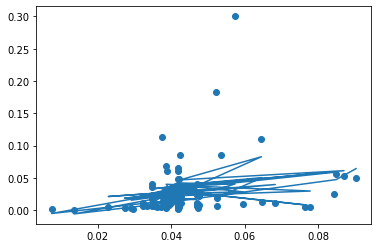

In [13]:
plt.scatter(X_test['HEIGHT'],y_test)
plt.plot(X_test['HEIGHT'], predictions_test)
plt.show()

In [15]:
#Model Evaluation
from sklearn import metrics
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions_test))
print('Root Mean Square Error:', rootMeanSqErr)

Root Mean Square Error: 0.03861426843421383
